# IBM HR Analytics Employee Attrition & Performance EDA

## 🎯 타겟 변수

| 변수명      | 한국어 이름 | 설명                        | 데이터 타입 |
|-------------|--------------|-----------------------------|-------------|
| Attrition   | 퇴사 여부    | 직원이 퇴사했는지 여부     | 범주형 (Yes/No) |

---

## 👤 인적 특성

| 변수명             | 한국어 이름     | 설명                            | 데이터 타입 |
|--------------------|------------------|----------------------------------|-------------|
| Age                | 나이             | 직원의 나이 (18~60세)            | 정수형 (int) |
| Gender             | 성별             | 남성/여성                        | 범주형 (Male/Female) |
| MaritalStatus      | 결혼 여부        | 미혼, 기혼, 이혼                 | 범주형 |
| Over18             | 성인 여부        | 모두 'Y'                         | 범주형 |
| NumCompaniesWorked | 이직 횟수        | 이전에 다닌 회사 수              | 정수형 (int) |

---

## 💼 직무 관련

| 변수명                  | 한국어 이름         | 설명                               | 데이터 타입 |
|-------------------------|----------------------|------------------------------------|-------------|
| Department              | 부서                 | Sales, R&D, HR                     | 범주형 |
| JobRole                 | 직무                 | 연구원, 영업, 관리자 등            | 범주형 |
| JobLevel                | 직급 수준            | 직급 등급 (1~5)                   | 순서형 (int) |
| BusinessTravel          | 출장 빈도            | 자주/가끔/없음                     | 범주형 |
| YearsAtCompany          | 회사 근속 연수       | 해당 회사에서 근무한 총 연수       | 정수형 (int) |
| YearsInCurrentRole      | 현재 직무 연수       | 현재 직무에서 일한 연수            | 정수형 (int) |
| YearsSinceLastPromotion | 최근 승진 이후 연수  | 마지막 승진 이후 경과한 연수       | 정수형 (int) |
| YearsWithCurrManager    | 현 상사와의 근무 연수 | 현재 상사와 함께 근무한 연수       | 정수형 (int) |

---

## 📚 학력 및 교육

| 변수명               | 한국어 이름     | 설명                         | 데이터 타입 |
|----------------------|------------------|------------------------------|-------------|
| Education            | 교육 수준        | 1~5 단계 (고졸~박사)         | 순서형 (int) |
| EducationField       | 전공 분야        | Life Sciences, Medical 등     | 범주형 |
| TrainingTimesLastYear| 연간 교육 횟수   | 1년간 수강한 교육 횟수       | 정수형 (int) |

---

## 💰 급여 및 복지

| 변수명           | 한국어 이름      | 설명                          | 데이터 타입 |
|------------------|-------------------|-------------------------------|-------------|
| MonthlyIncome     | 월급              | 실제 월급 금액(보너스 등 포함)                | 연속형 (float/int) |
| HourlyRate        | 시급              | 시간당 급여                   | 정수형 (int) |
| DailyRate         | 일급              | 하루 단위 급여                | 정수형 (int) |
| MonthlyRate       | 월 단위 급여      | 월별 급여 수준                | 정수형 (int) |
| PercentSalaryHike | 급여 인상률       | 최근 연봉 인상률              | 정수형 (int) |
| StockOptionLevel  | 스톡옵션 수준     | 0~3단계                       | 순서형 (int) |
| OverTime          | 초과 근무 여부    | 초과근무 여부 (`Yes`, `No`)   | 범주형 |

---

## 🧠 직무 만족도 및 성과

| 변수명                  | 한국어 이름         | 설명                          | 데이터 타입 |
|--------------------------|----------------------|-------------------------------|-------------|
| JobSatisfaction          | 직무 만족도          | 1~4 점                        | 순서형 (int) |
| EnvironmentSatisfaction  | 근무 환경 만족도     | 1~4 점                        | 순서형 (int) |
| RelationshipSatisfaction | 대인관계 만족도      | 1~4 점                        | 순서형 (int) |
| WorkLifeBalance          | 워라밸 만족도        | 1~4 점                        | 순서형 (int) |
| PerformanceRating        | 성과 평가 등급       | 보통 3 또는 4                 | 순서형 (int) |

---

## 🔢 기타 변수

| 변수명          | 한국어 이름       | 설명                           | 데이터 타입 |
|-----------------|--------------------|--------------------------------|-------------|
| DistanceFromHome| 집과의 거리        | 집에서 회사까지 거리           | 정수형 (int) |
| TotalWorkingYears| 총 경력 연수      | 지금까지 일한 총 연수          | 정수형 (int) |
| EmployeeNumber  | 직원 고유 번호     | 식별자                         | 정수형 (ID) |
| EmployeeCount   | 직원 수            | 모두 1                        | 상수 |
| StandardHours   | 표준 근무 시간     | 모두 80                     | 상수 |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv('./data/HR_Employee_Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
object_col = []
for column in data.columns:
    if data[column].dtype == object: # and len(data[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("====================================")

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [8]:
disc_col = []
for column in data.columns:
    if data[column].dtypes != object: # and data[column].nunique() < 30:
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("====================================")

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  702 1157  602 1480 1268  713  134  52

In [9]:
cont_col = []
for column in data.columns:
    if data[column].dtypes != object: # and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
DistanceFromHome : Minimum: 1, Maximum: 29
Education : Minimum: 1, Maximum: 5
EmployeeCount : Minimum: 1, Maximum: 1
EmployeeNumber : Minimum: 1, Maximum: 2068
EnvironmentSatisfaction : Minimum: 1, Maximum: 4
HourlyRate : Minimum: 30, Maximum: 100
JobInvolvement : Minimum: 1, Maximum: 4
JobLevel : Minimum: 1, Maximum: 5
JobSatisfaction : Minimum: 1, Maximum: 4
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
NumCompaniesWorked : Minimum: 0, Maximum: 9
PercentSalaryHike : Minimum: 11, Maximum: 25
PerformanceRating : Minimum: 3, Maximum: 4
RelationshipSatisfaction : Minimum: 1, Maximum: 4
StandardHours : Minimum: 80, Maximum: 80
StockOptionLevel : Minimum: 0, Maximum: 3
TotalWorkingYears : Minimum: 0, Maximum: 40
TrainingTimesLastYear : Minimum: 0, Maximum: 6
WorkLifeBalance : Minimum: 1, Maximum: 4
YearsAtCompany : Minimum: 0, Maximum: 40
YearsInCurrentRole : Minimum: 0, Maxim

In [10]:
custom_colors = [
    '#1f77b4',  # 파랑
    '#ff7f0e',  # 주황
    '#2ca02c',  # 초록
    '#d62728',  # 빨강
    '#9467bd',  # 보라
    '#8c564b',  # 갈색
    '#e377c2',  # 분홍
    '#7f7f7f',  # 회색
    '#bcbd22'   # 연두/올리브
]

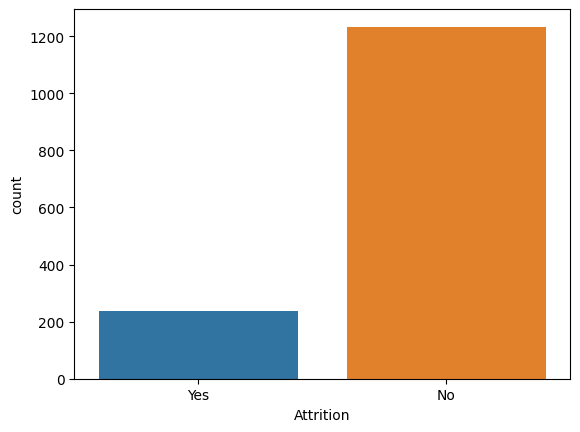

In [11]:
sns.countplot(x='Attrition', data=data, hue = 'Attrition', palette=custom_colors[:2])
plt.show()

C:\Users\HP001\AppData\Local\Temp\ipykernel_5352\1955206534.py:6: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
C:\Users\HP001\AppData\Local\Temp\ipykernel_5352\1955206534.py:6: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
C:\Users\HP001\AppData\Local\Temp\ipykernel_5352\1955206534.py:6: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
C:\Users\HP001\AppData\Local\Temp\ipykernel_5352\1955206534.py:6: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
C:\Users\HP001\A

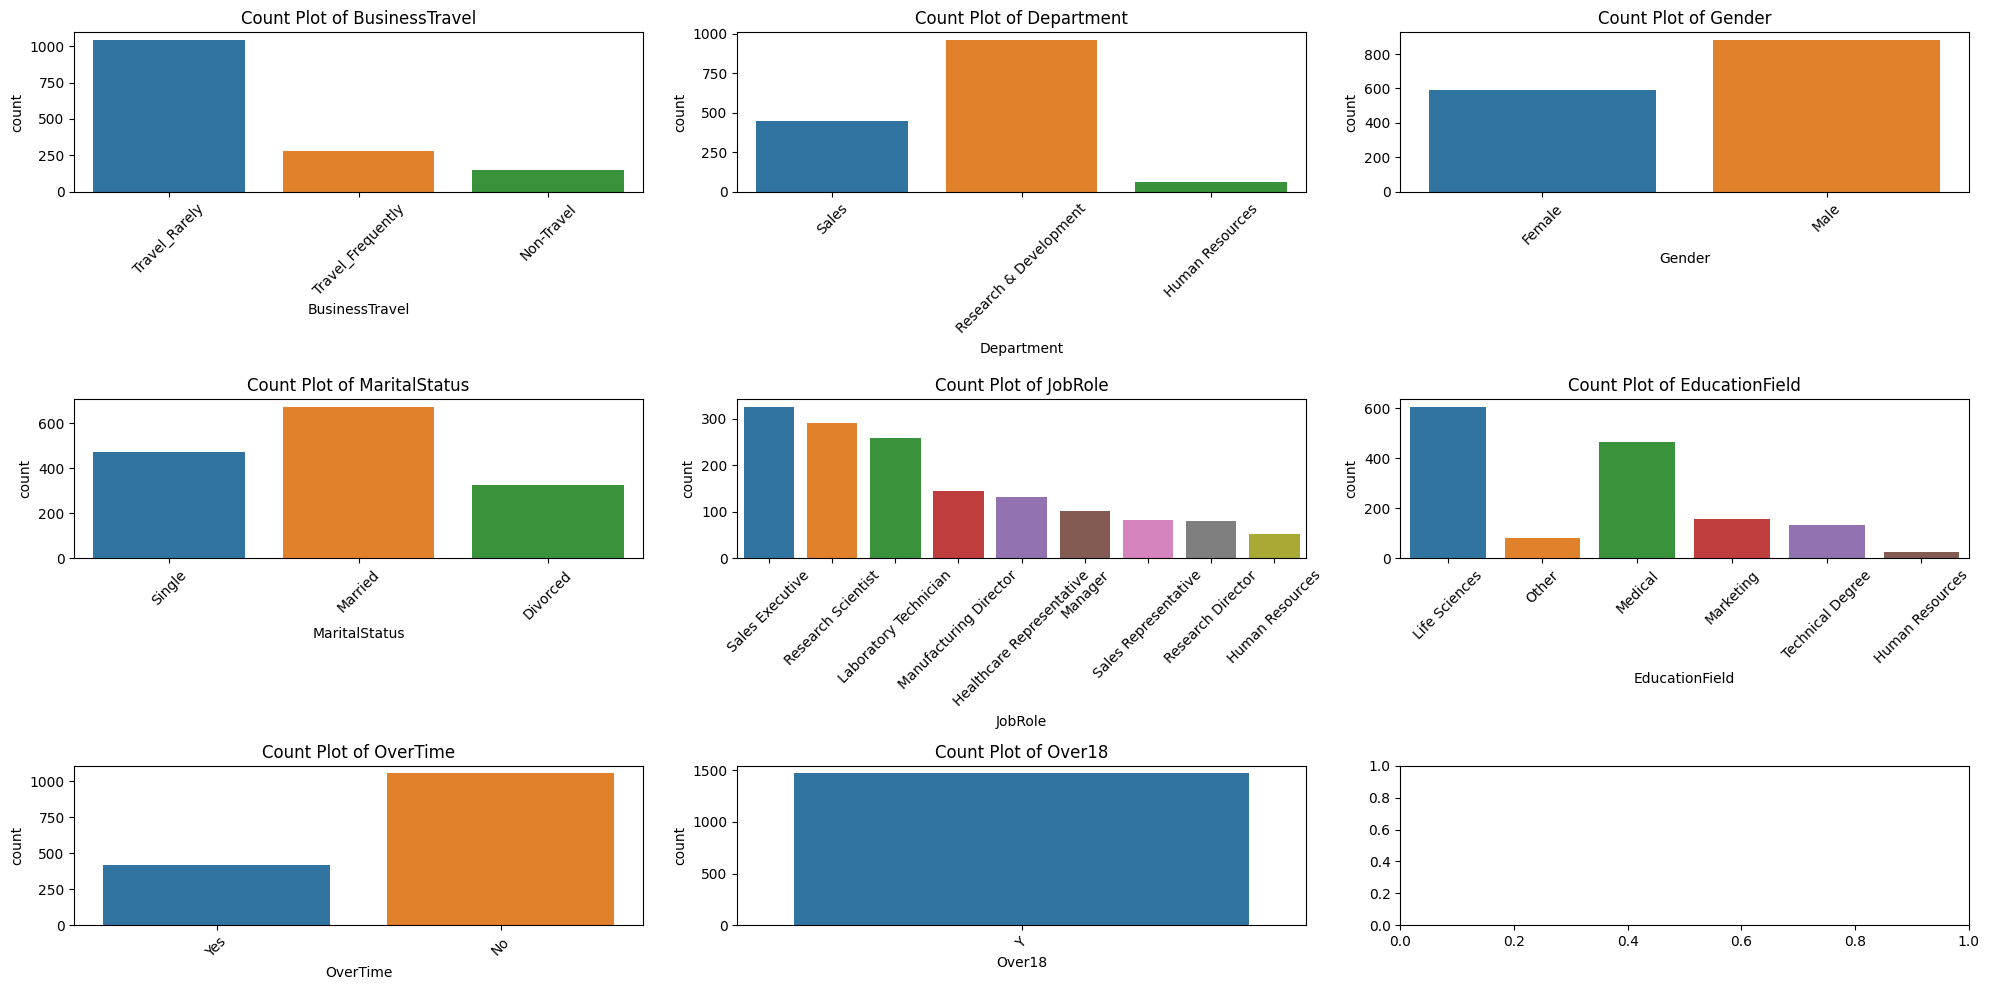

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()
columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'JobRole', 'EducationField', 'OverTime', 'Over18']

for i, column in enumerate(columns):
    sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels if needed

plt.tight_layout()  
plt.show()

In [ ]:
sns.pairplot(data, hue='Attrition')
plt.show()

In [40]:
print(data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
# df = data.drop(columns=['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours'])
# df.head()

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# 변환한 매핑을 저장할 딕셔너리
label_mappings = {}

for col in ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 
            'JobRole', 'EducationField', 'OverTime', 'Over18', 'Attrition']:
    data[col] = encoder.fit_transform(data[col])
    # 매핑 저장
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# 매핑 결과 보기
for col, mapping in label_mappings.items():
    print(f"=== {col} ===")
    print(mapping)
    print()

=== BusinessTravel ===
{'Non-Travel': np.int64(0), 'Travel_Frequently': np.int64(1), 'Travel_Rarely': np.int64(2)}

=== Department ===
{'Human Resources': np.int64(0), 'Research & Development': np.int64(1), 'Sales': np.int64(2)}

=== Gender ===
{'Female': np.int64(0), 'Male': np.int64(1)}

=== MaritalStatus ===
{'Divorced': np.int64(0), 'Married': np.int64(1), 'Single': np.int64(2)}

=== JobRole ===
{'Healthcare Representative': np.int64(0), 'Human Resources': np.int64(1), 'Laboratory Technician': np.int64(2), 'Manager': np.int64(3), 'Manufacturing Director': np.int64(4), 'Research Director': np.int64(5), 'Research Scientist': np.int64(6), 'Sales Executive': np.int64(7), 'Sales Representative': np.int64(8)}

=== EducationField ===
{'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int64(5)}

=== OverTime ===
{'No': np.int64(0), 'Yes': np.int64(1)}

=== Over18 ===
{'Y': np.int64(0)

In [15]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


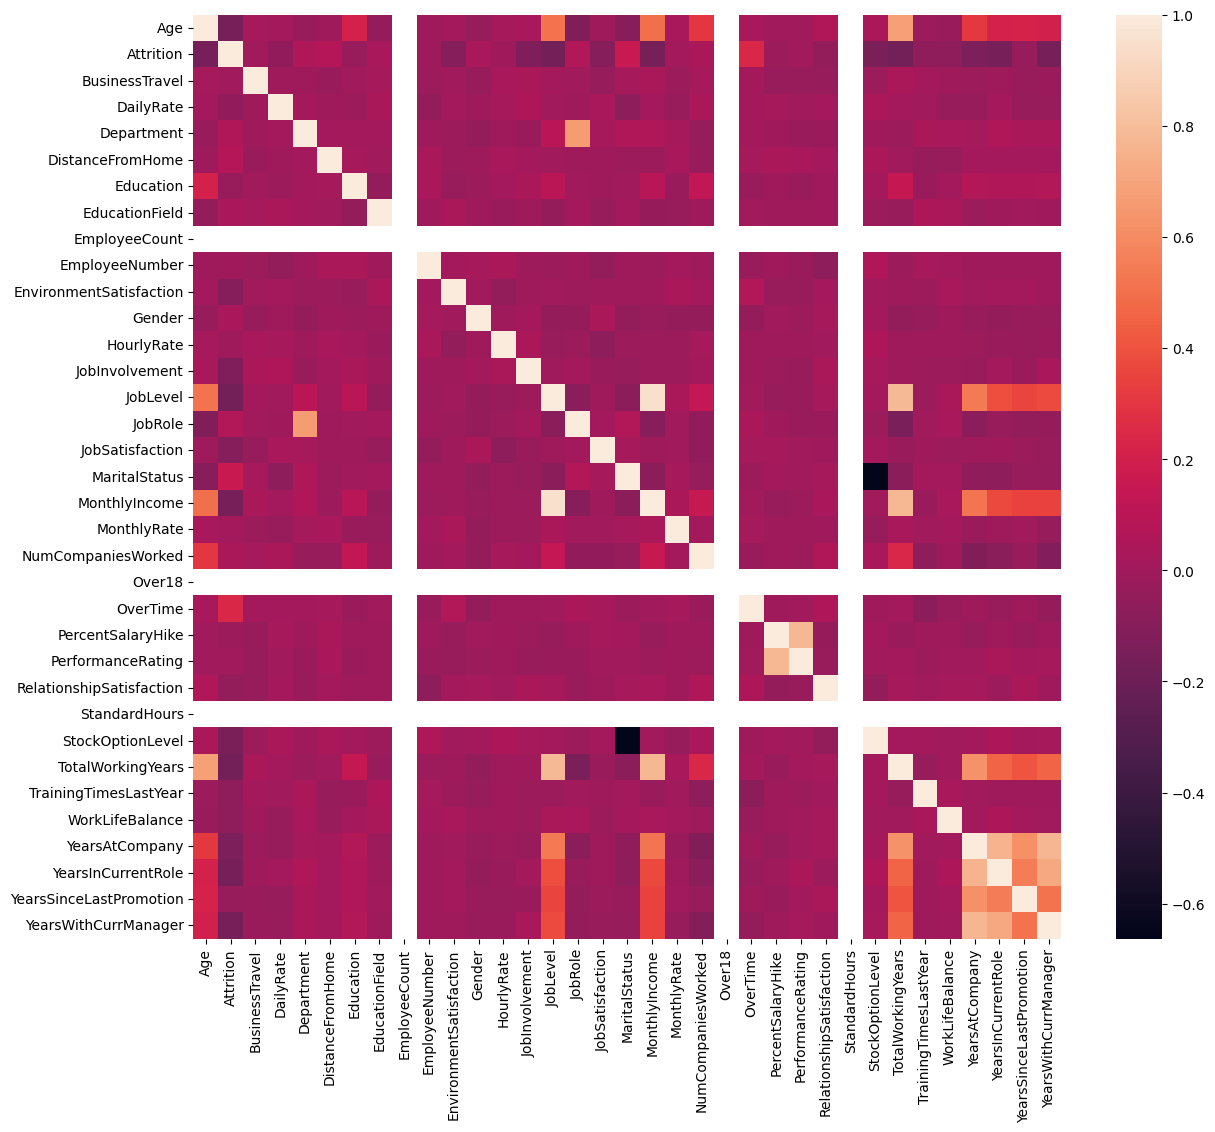

In [16]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(corr_mat, annot=False)
plt.show()

In [23]:
filtered_corr = corr_mat[corr_mat.abs() >= 0.1]

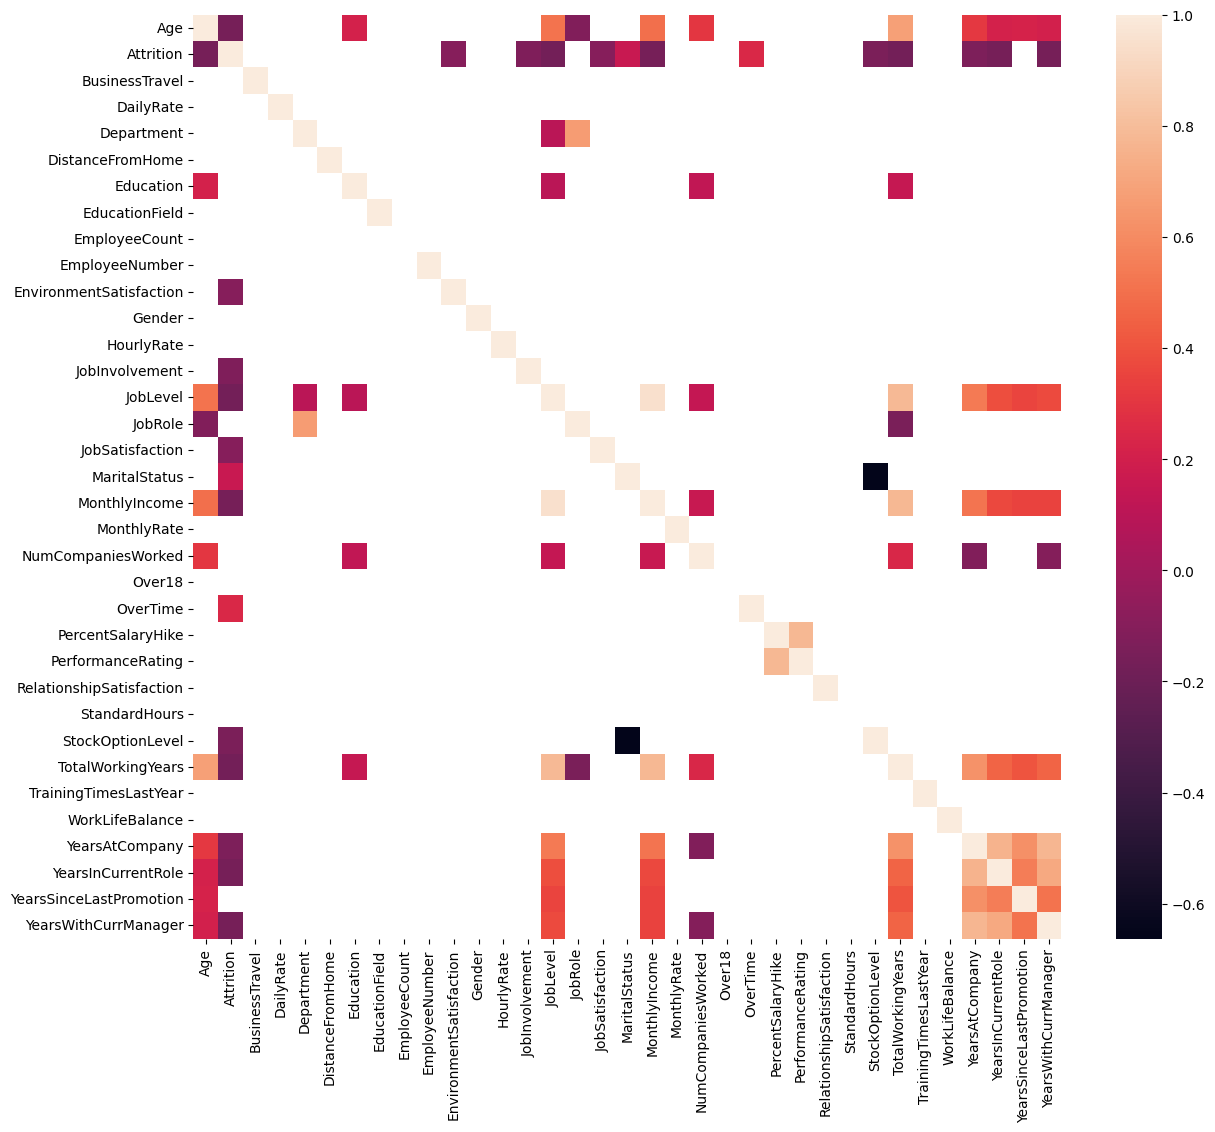

In [24]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(filtered_corr, annot=False)
plt.show()

In [30]:
target = 'Attrition'

# Attrition 열만 가져오기
target_corr = corr_mat[target]

# 조건: |상관계수| >= 0.1 인 것만 남기기
filtered_corr_attrition = target_corr[(target_corr <= -0.1) | (target_corr >= 0.1)]

print(filtered_corr_attrition)
print(len(filtered_corr_attrition))
filtered_columns = filtered_corr_attrition.index.tolist()
print(filtered_columns)

Age                       -0.159205
Attrition                  1.000000
EnvironmentSatisfaction   -0.103369
JobInvolvement            -0.130016
JobLevel                  -0.169105
JobSatisfaction           -0.103481
MaritalStatus              0.162070
MonthlyIncome             -0.159840
OverTime                   0.246118
StockOptionLevel          -0.137145
TotalWorkingYears         -0.171063
YearsAtCompany            -0.134392
YearsInCurrentRole        -0.160545
YearsWithCurrManager      -0.156199
Name: Attrition, dtype: float64
14
['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [31]:
df = data[filtered_columns]
df.head()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,3,2,4,2,5993,1,0,8,6,4,5
1,49,0,3,2,2,2,1,5130,0,1,10,10,7,7
2,37,1,4,2,1,3,2,2090,1,0,7,0,0,0
3,33,0,4,3,1,3,1,2909,1,0,8,8,7,0
4,27,0,1,3,1,2,1,3468,0,1,6,2,2,2


In [35]:
filtered_corr_mat = df.corr(numeric_only=True)
filtered_corr_mat

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Age,1.000000,-0.159205,0.010146,0.029820,0.509604,-0.004892,-0.095029,0.497855,0.028062,0.037510,0.680381,0.311309,0.212901,0.202089
Attrition,-0.159205,1.000000,-0.103369,-0.130016,-0.169105,-0.103481,0.162070,-0.159840,0.246118,-0.137145,-0.171063,-0.134392,-0.160545,-0.156199
EnvironmentSatisfaction,0.010146,-0.103369,1.000000,-0.008278,0.001212,-0.006784,-0.003593,-0.006259,0.070132,0.003432,-0.002693,0.001458,0.018007,-0.004999
JobInvolvement,0.029820,-0.130016,-0.008278,1.000000,-0.012630,-0.021476,-0.038497,-0.015271,-0.003507,0.021523,-0.005533,-0.021355,0.008717,0.025976
JobLevel,0.509604,-0.169105,0.001212,-0.012630,1.000000,-0.001944,-0.076769,0.950300,0.000544,0.013984,0.782208,0.534739,0.389447,0.375281
JobSatisfaction,-0.004892,-0.103481,-0.006784,-0.021476,-0.001944,1.000000,0.024360,-0.007157,0.024539,0.010690,-0.020185,-0.003803,-0.002305,-0.027656
MaritalStatus,-0.095029,0.162070,-0.003593,-0.038497,-0.076769,0.024360,1.000000,-0.075450,-0.017521,-0.662577,-0.077886,-0.059986,-0.065822,-0.038570
MonthlyIncome,0.497855,-0.159840,-0.006259,-0.015271,0.950300,-0.007157,-0.075450,1.000000,0.006089,0.005408,0.772893,0.514285,0.363818,0.344079
OverTime,0.028062,0.246118,0.070132,-0.003507,0.000544,0.024539,-0.017521,0.006089,1.000000,-0.000449,0.012754,-0.011687,-0.029758,-0.041586
StockOptionLevel,0.037510,-0.137145,0.003432,0.021523,0.013984,0.010690,-0.662577,0.005408,-0.000449,1.000000,0.010136,0.015058,0.050818,0.024698


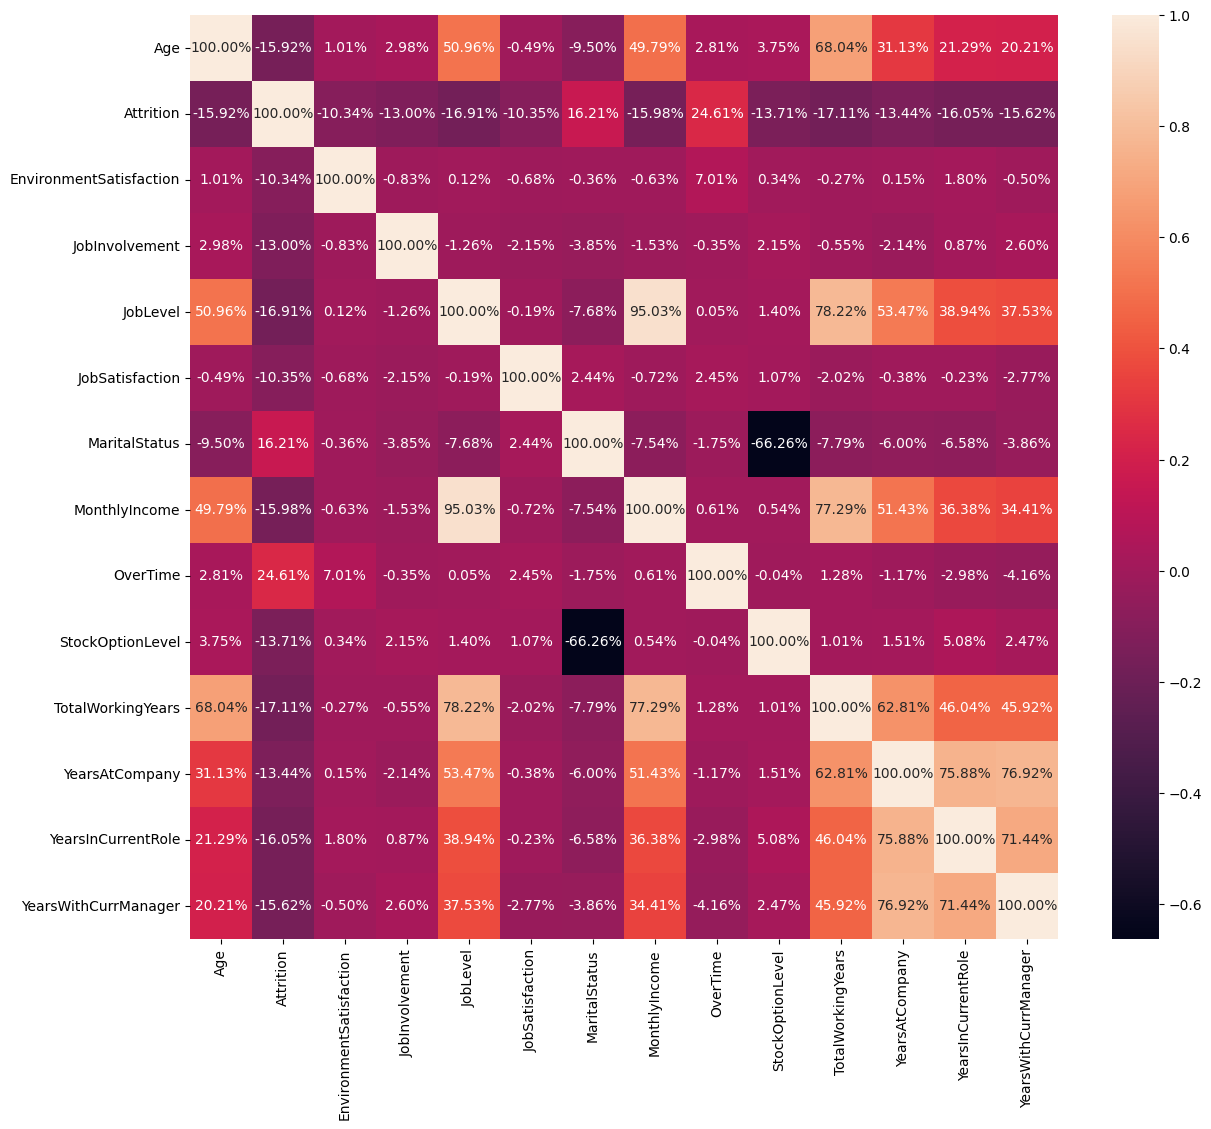

In [37]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(filtered_corr_mat, annot=True, fmt='.2%')
plt.show()

## 결론
1. 컬럼 수가 너무 많음  -> 학습할 때 불필요한 것 제외 필수
    
    -> 기준을 attrition과 상관계수의 절대값이 0.1 이상인 것만 필터링 -> 13개

2. 데이터 불균형이 심함(Attrition의 비율이 약 1:4)

    -> 불균형 해결하고 학습 필요

    -> ex) 가중치, 샘플링, 적절한 평가지표(Precision, Recall, F1 Score, ROC-AUC등) 사용 등